# 支持向量机

此Notebook是配合Andrew Ng "Machine Leanring"中[支持向量机 SVM](https://github.com/loveunk/machine-learning-deep-learning-notes/blob/master/machine-learning/svm.md)部分学习使用。

测试用Python版本为3.6
* 机器学习路径：https://github.com/loveunk/machine-learning-deep-learning-notes/
* 内容正文综合参考网络资源，使用中如果有疑问请联络：https://www.kaikai.ai

## 1. SVM

在本练习中，我们将使用支持向量机（SVM）来构建垃圾邮件分类器。 在前半部分，你将在一些2D数据集上应用SVM，以便对SVM和高斯核的SVM如何工作由一个直观感受。在后半部分，你将使用SVM构建一个垃圾邮件分类器。

### 1.1 数据集1
先来看一个简单的二维数据集。

第一步先加载数据：

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

raw_data = loadmat('data/ex6data1.mat')

将数据用散点图表示，其中类别标签由符号表示（+表示正类，o表示负类）。

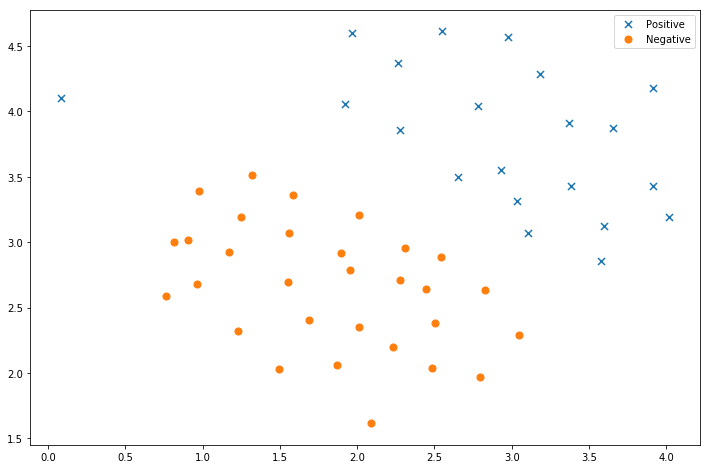

In [58]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()
plt.show()

可以看到，有一个异常的正例在其他样本之外，大约位于 (0.1, 4.1)的位置。

这些类仍然是线性分离的，但它非常紧凑。我们要训练线性支持向量机来学习类边界。

在这部分练习中，你将尝试SVM不同的C值。不严谨地讲，参数$C$是一个用于控制错误分类样本的惩罚项。对于训练样本，使用越大的$C$，分类器会得到更为正确的分类。$C$的功能类似$\frac{1}{\lambda}$，其中$\lambda$ 是线性/逻辑回归中的正则化项。

在这个练习中，我们没有从头开始执行SVM的任务，这里使用scikit-learn。

In [59]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)

首先，我们使用 C=1 看下结果如何。

In [60]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

D:\Anaconda3\envs\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

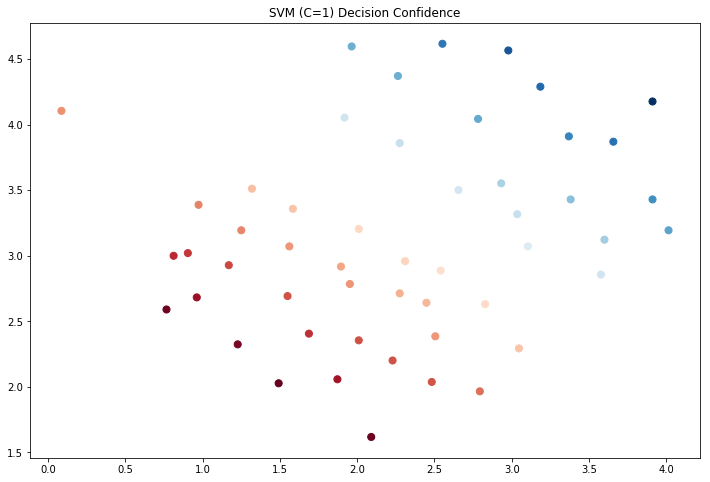

In [61]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

其次，让我们看看如果C的值越大，会发生什么

In [62]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

D:\Anaconda3\envs\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1.0

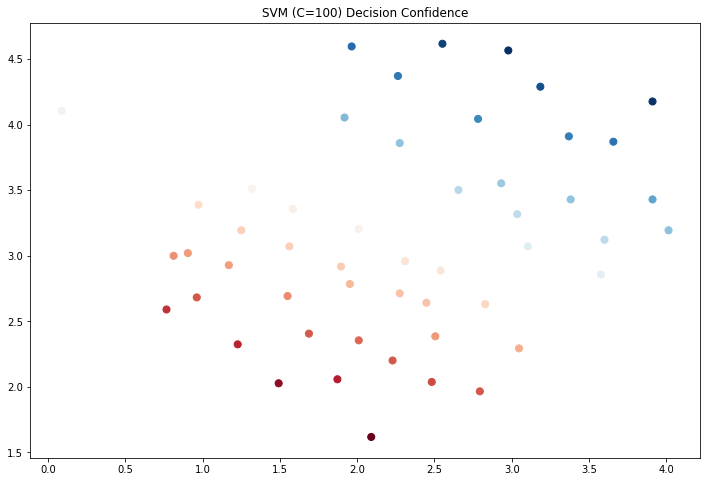

In [63]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()

这次我们得到了训练数据的完美分类，但是通过增加C的值，我们创建了一个不再适合数据的决策边界。 我们可以通过查看每个类别预测的置信水平来看出这一点，这是该点与超平面距离的函数。

对于上述实验，你可以尝试不同的$C$观察分类的效果。

## 1.2 高斯核 SVM
在这一部分，你将使用SVM进行非线性分类。具体来讲，你将在不可线性分离的数据集上使用具有高斯内核的SVM。

### 1.2.1 高斯核
这里你将实现一个高斯核函数。

高斯核函数的定义为：
$$
K_{gaussian}(x^{(i)}, y^{(j)})
=exp\left(-\dfrac{||x^{(i)} - y^{(j)}||^2}{2\sigma^2}\right)
=exp\left(-\dfrac{\sum_{k=1}^n(x^{(i)} - y^{(j)})^2}{2\sigma^2}\right)
$$

In [64]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

In [65]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

# 如果你实现的高斯核函数没问题，预期的输出值为 0.32465246735834974

0.32465246735834974

### 1.2.2 数据集2
接下来，我们将检查另一个数据集，这次用非线性决策边界。

先加载数据集，绘制出来。

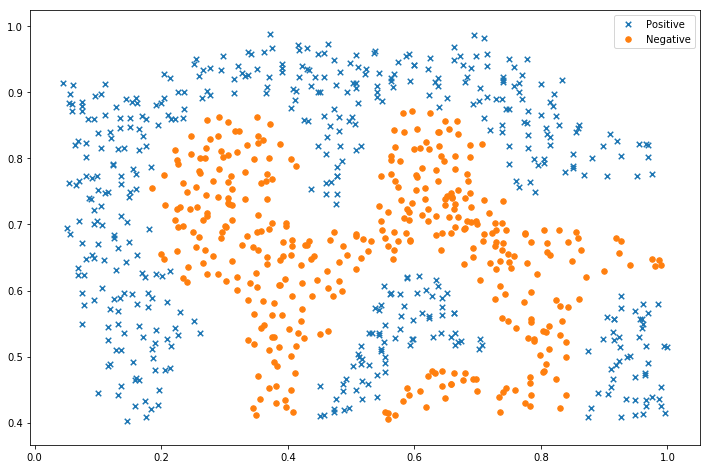

In [75]:
raw_data = loadmat('data/ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()
plt.show()

从图中可以看出，线性的分类界是无法把数据集分为正负两类的。然后，使用高斯核的SVM，你将获得一个不错的分类界。

对于该数据集，我们将使用内置的RBF内核构建支持向量机分类器，并检查其对训练数据的准确性。 为了可视化决策边界，这一次我们将根据实例具有负类标签的预测概率来对点做阴影。 从结果可以看出，它们大部分是正确的。

In [77]:
svc = svm.SVC(C=100, gamma=10, probability=True)
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

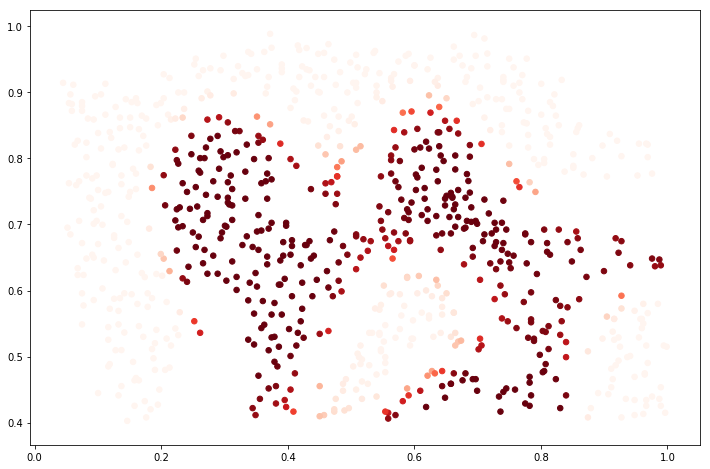

In [78]:
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')
plt.show()

### 1.1.3 数据集3

第三个数据集：

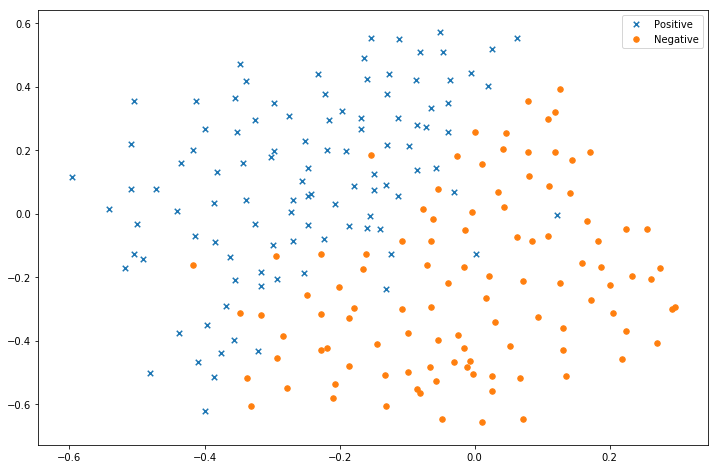

In [80]:
raw_data = loadmat('data/ex6data3.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()
plt.show()

对于这个数据集，我们给出了训练和验证集。

希望你基于验证集性能为SVM模型找到最优超参数$C$和$\sigma$。 

In [84]:
X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

best_svc = None
for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma, probability=True)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma
            best_svc = svc

best_score, best_params

(0.965, {'C': 0.3, 'gamma': 100})

画出边界来看看：

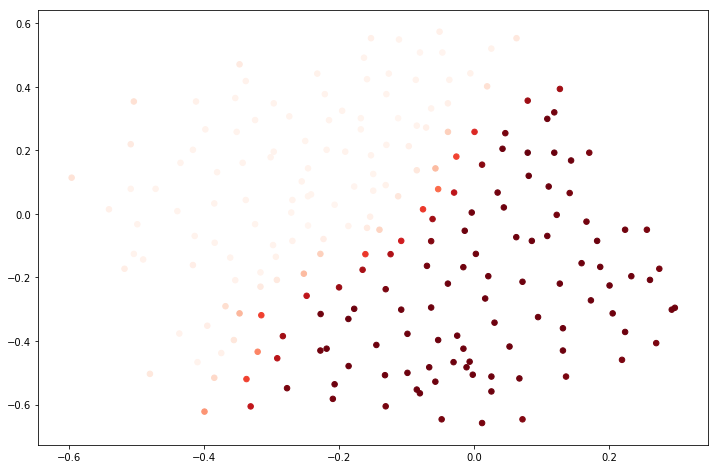

In [85]:
data['Probability'] = best_svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')
plt.show()

## 2.垃圾邮件分类

在这一部分，我们的目标是使用SVM来构建垃圾邮件过滤器。

在原始的Assignment中，有一个任务涉及一些文本预处理，以获得适合SVM处理的格式的数据。 其实这部分任务很简单（将字词映射到为练习提供的字典中的ID），而其余的预处理步骤（如HTML删除，词干，标准化等）已经完成。

这里将跳过这些预处理步骤，其中包括从预处理过的训练集构建分类器，以及将垃圾邮件和非垃圾邮件转换为单词出现次数的向量的测试数据集。

首先，加载数据集：

In [88]:
spam_train = loadmat('data/spamTrain.mat')
spam_test = loadmat('data/spamTest.mat')

In [89]:
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

每个文档已经转换为一个向量，其中1,899个维对应于词汇表中的1,899个单词。 它们的值为二进制，表示文档中是否存在单词。 在这一点上，训练评估是用一个分类器拟合测试数据的问题。

In [92]:
svc = svm.SVC(gamma='auto')
svc.fit(X, y)
print('Training accuracy = {0}%'.format(np.round(svc.score(X, y) * 100, 2)))

Training accuracy = 94.4%


In [91]:
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))

Test accuracy = 95.3%


这个结果是使用使用默认参数的。 我们可能会使用一些参数调整来获得更高的精度，尽管95％的精度相当不错。

## 2.1 试试逻辑回归

In [97]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(solver='lbfgs')
logit.fit(X, y)
pred = logit.predict(Xtest)
print(metrics.classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       692
           1       0.99      0.99      0.99       308

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



有没发现，逻辑回归，其实也不错 -_-||